In [2]:
import pandas as pd

# Load CSV file
df = pd.read_csv(r"D:\VT\PYTHON\sales_data.csv")

# Display first few rows
print(df.head())

         Date Product     Category  Sales  Quantity  Profit
0  2024-01-01  Laptop  Electronics   1200         2     300
1  2024-01-02   Phone  Electronics    800         3     200
2  2024-01-03   Shoes      Fashion    150         4      50
3  2024-01-04   Watch  Accessories    100         2      30
4  2024-01-05  Tablet  Electronics    600         1     100


In [3]:
# Check dataset info
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      5 non-null      object
 1   Product   5 non-null      object
 2   Category  5 non-null      object
 3   Sales     5 non-null      int64 
 4   Quantity  5 non-null      int64 
 5   Profit    5 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 372.0+ bytes
None
             Sales  Quantity      Profit
count     5.000000  5.000000    5.000000
mean    570.000000  2.400000  136.000000
std     460.434577  1.140175  112.827302
min     100.000000  1.000000   30.000000
25%     150.000000  2.000000   50.000000
50%     600.000000  2.000000  100.000000
75%     800.000000  3.000000  200.000000
max    1200.000000  4.000000  300.000000
Date        0
Product     0
Category    0
Sales       0
Quantity    0
Profit      0
dtype: int64


In [4]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
print(df.head())

         Date Product     Category  Sales  Quantity  Profit
0  2024-01-01  Laptop  Electronics   1200         2     300
1  2024-01-02   Phone  Electronics    800         3     200
2  2024-01-03   Shoes      Fashion    150         4      50
3  2024-01-04   Watch  Accessories    100         2      30
4  2024-01-05  Tablet  Electronics    600         1     100


In [7]:
print(df.isnull().sum())

Date        0
Product     0
Category    0
Sales       0
Quantity    0
Profit      0
dtype: int64


In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
print(f"Total Sales: ${total_sales}")
print(f"Total Profit: ${total_profit}")

Total Sales: $2850
Total Profit: $680


In [10]:
best_selling_product = df.groupby("Product")["Sales"].sum().idxmax()
most_profitable_product = df.groupby("Product")["Profit"].sum().idxmax()
print(f"Best-Selling Product: {best_selling_product}")
print(f"Most Profitable Product: {most_profitable_product}")

Best-Selling Product: Laptop
Most Profitable Product: Laptop


In [11]:
sales_by_category = df.groupby("Category")["Sales"].sum()
print(sales_by_category)

Category
Accessories     100
Electronics    2600
Fashion         150
Name: Sales, dtype: int64


C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_15188\1358128807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="viridis")


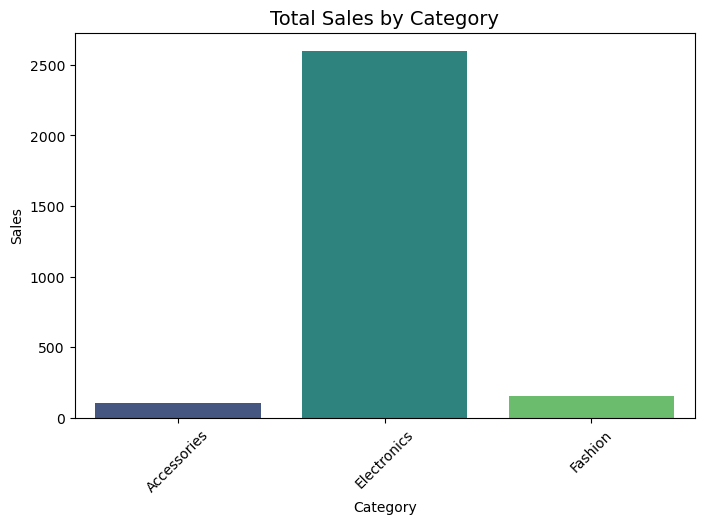

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="viridis")
plt.title("Total Sales by Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

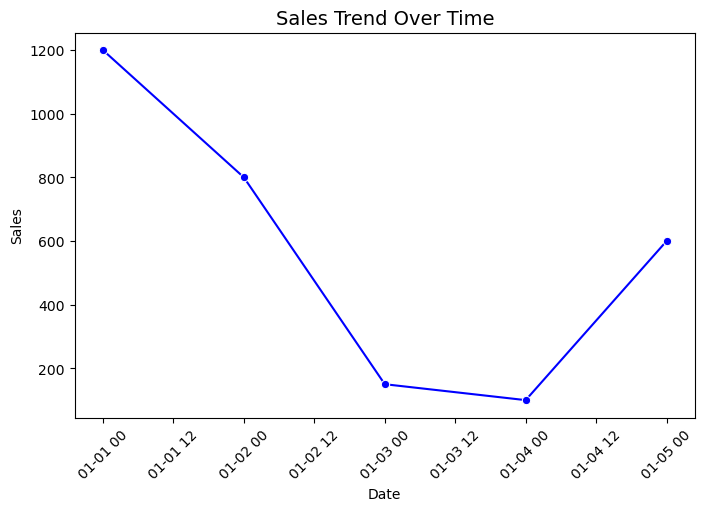

In [13]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=df["Date"], y=df["Sales"], marker="o", color="b")
plt.title("Sales Trend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

In [14]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [16]:
df["Profit Margin (%)"] = (df["Profit"] / df["Sales"]) * 100
print(df[["Product", "Profit Margin (%)"]])

  Product  Profit Margin (%)
0  Laptop          25.000000
1   Phone          25.000000
2   Shoes          33.333333
3   Watch          30.000000
4  Tablet          16.666667


C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_15188\999834356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="Profit Margin (%)", data=df, palette="coolwarm")


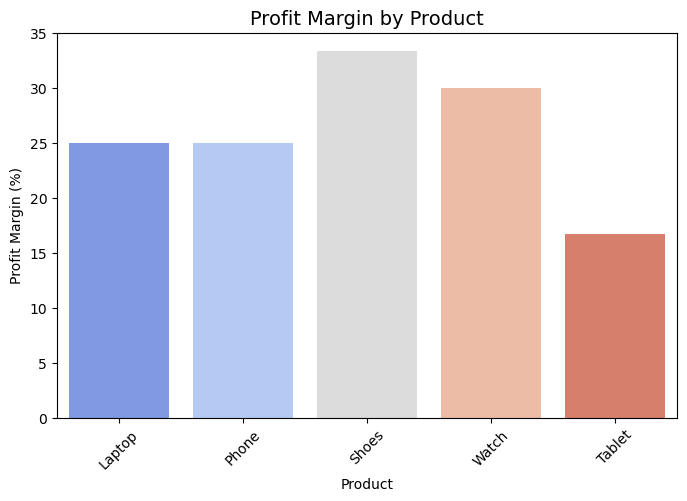

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Product", y="Profit Margin (%)", data=df, palette="coolwarm")
plt.title("Profit Margin by Product", fontsize=14)
plt.xlabel("Product")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45)
plt.show()

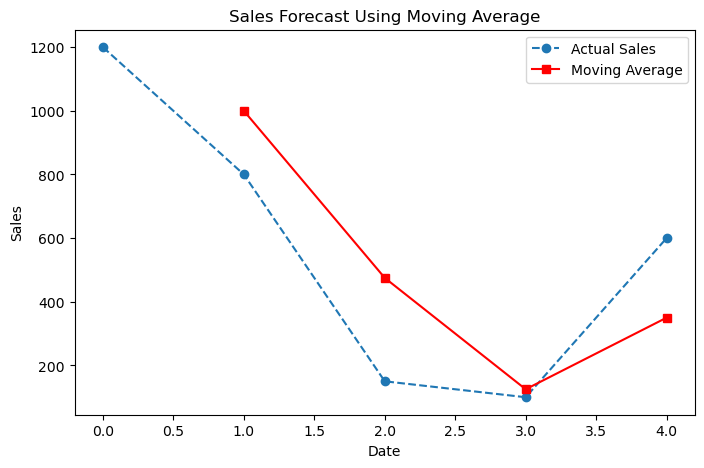

In [18]:
df["Sales_MA"] = df["Sales"].rolling(window=2).mean()  # 2-day moving average
plt.figure(figsize=(8, 5))
plt.plot(df.index, df["Sales"], marker="o", label="Actual Sales", linestyle="dashed")
plt.plot(df.index, df["Sales_MA"], marker="s", label="Moving Average", color="r")
plt.title("Sales Forecast Using Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


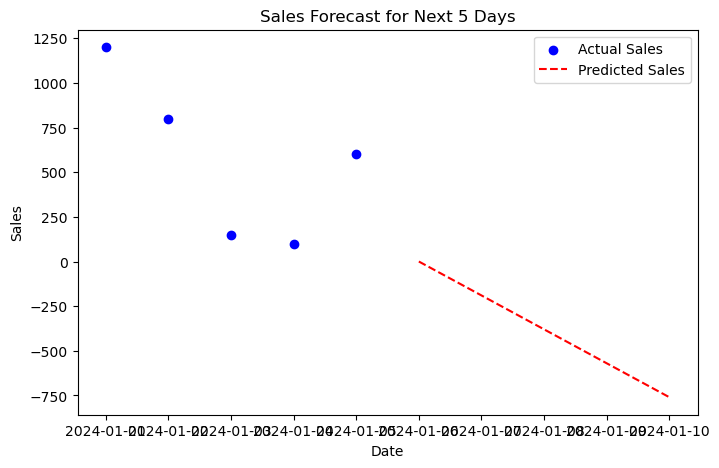

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv(r"D:\VT\PYTHON\sales_data.csv")

# Ensure Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)  # Set Date as index

# Convert Date to Ordinal for Regression
df["Days"] = df.index.map(lambda x: x.toordinal())

# Train Linear Regression Model
X = df[["Days"]]  # Feature
y = df["Sales"]   # Target
model = LinearRegression()
model.fit(X, y)

# Predict Future Sales (Next 5 Days)
future_dates = [df.index[-1] + pd.Timedelta(days=i) for i in range(1, 6)]
future_days = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
predicted_sales = model.predict(future_days)

# 🔥 FIX: Convert Ordinal Days Back to Datetime Correctly
future_dates = [pd.Timestamp.fromordinal(int(day)) for day in future_days.flatten()]

# Plot Actual Sales and Predictions
plt.figure(figsize=(8, 5))
plt.scatter(df.index, df["Sales"], label="Actual Sales", color="blue")
plt.plot(future_dates, predicted_sales, label="Predicted Sales", color="red", linestyle="dashed")
plt.title("Sales Forecast for Next 5 Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


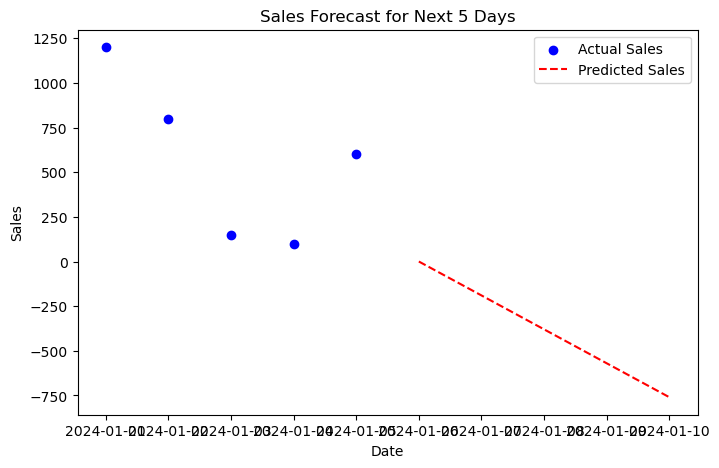

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv(r"D:\VT\PYTHON\sales_data.csv")

# Ensure Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)  # Set Date as index

# Convert Date to Ordinal (numeric format for regression)
df["Days"] = df.index.map(lambda x: x.toordinal())

# Train Linear Regression Model
X = df[["Days"]]  # Features
y = df["Sales"]   # Target Variable
model = LinearRegression()
model.fit(X, y)

# Predict Future Sales (Next 5 Days)
future_dates = [df.index[-1] + pd.Timedelta(days=i) for i in range(1, 6)]
future_days = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
predicted_sales = model.predict(future_days)

# 🔥 FIX: Convert back correctly
future_dates = [pd.Timestamp.fromordinal(int(day)) for day in future_days.flatten()]

# Plot Actual Sales and Predictions
plt.figure(figsize=(8, 5))
plt.scatter(df.index, df["Sales"], label="Actual Sales", color="blue")
plt.plot(future_dates, predicted_sales, label="Predicted Sales", color="red", linestyle="dashed")
plt.title("Sales Forecast for Next 5 Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()